# Tema 2: PyTorch - Autograd, MLP con iris


La **diferenciación automática** es un método computacional para *calcular derivadas de forma eficiente y precisa*. Es fundamental en aprendizaje profundo porque permite actualizar los pesos de una red neuronal mediante gradientes.


In [ ]:
import torch

## 1. Crear tensores que permitan calcular los gradientes.

In [ ]:
x = torch.tensor(2.0)
y = x **2

print(x)

tensor(2.)


In [ ]:
y.backward()
print(x.grad)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
x = torch.tensor(5.0, requires_grad=True)
y = 2*x

print(x)

tensor(5., requires_grad=True)


In [ ]:
y.backward()
print(x.grad)

tensor(2.)


## 2. Reinicio de gradientes

Durante el entrenamiento, los gradientes se acumulan (suman) en cada iteración del bucle de entrenamiento.

Para evitar usar gradientes acumulados de iteraciones anteriores, debemos reiniciar los gradientes después de cada paso.

* grad.zero_()
* zero_grad()

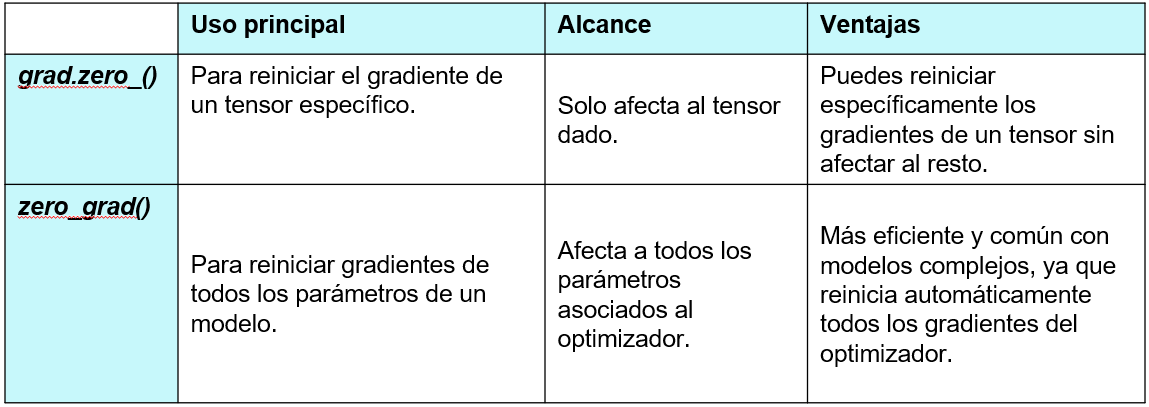

### Reinicio de gradientes utilizando *grad.zero_()*

In [ ]:
x = torch.tensor(5.0, requires_grad=True)

y = 2*x**3

y.backward()
print(x.grad)

tensor(150.)


In [ ]:
x.grad.zero_()

tensor(0.)

In [ ]:
print(x.grad)

tensor(0.)


### Reinicio de gradientes utilizando *zero_grad()*

In [ ]:
x = torch.tensor(5.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1)

y = 2*x**3

y.backward()
print(x.grad)

tensor(150.)


In [ ]:
optimizer.zero_grad()

In [ ]:
print(x.grad)

None


## 3. Uso de gradientes para optimizar un modelo

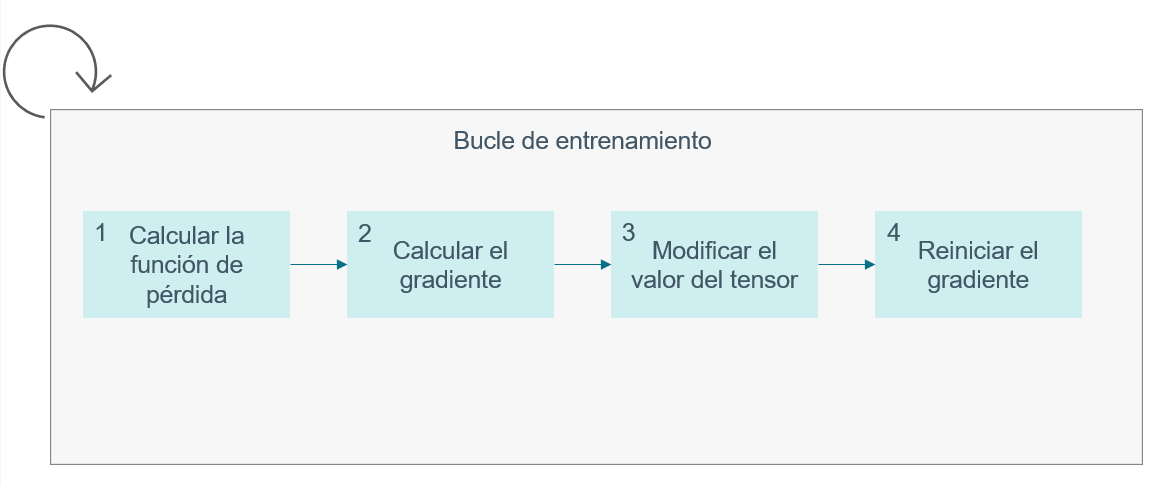

In [ ]:
x = torch.tensor(5.0, requires_grad=True)

for epoch in range(5):
    loss = x ** 2

    loss.backward()

    print(f"Epoca: {epoch+1}")
    print(f"X: {x:.2f} | Gradiente: {x.grad:.2f}")

    with torch.no_grad():
      x -= x.grad * 0.1

    x.grad.zero_()

Epoca: 1
X: 5.00 | Gradiente: 10.00
Epoca: 2
X: 4.00 | Gradiente: 8.00
Epoca: 3
X: 3.20 | Gradiente: 6.40
Epoca: 4
X: 2.56 | Gradiente: 5.12
Epoca: 5
X: 2.05 | Gradiente: 4.10


In [ ]:
x = torch.tensor(5.0, requires_grad=True)

# Definir el optimizador
learning_rate = 0.1
optimizer = torch.optim.SGD([x], lr=learning_rate)

for epoch in range(5):
    loss = x ** 2

    loss.backward()

    print(f"Epoca: {epoch+1}")
    print(f"X: {x:.2f} | Gradiente: {x.grad:.2f}")

    optimizer.step()


    optimizer.zero_grad()

Epoca: 1
X: 5.00 | Gradiente: 10.00
Epoca: 2
X: 4.00 | Gradiente: 8.00
Epoca: 3
X: 3.20 | Gradiente: 6.40
Epoca: 4
X: 2.56 | Gradiente: 5.12
Epoca: 5
X: 2.05 | Gradiente: 4.10


## Modelo MLP

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### 1. Crear el MLP

In [ ]:
class MLP_pytorch(nn.Module):
    def __init__(self, input_shape=13, n_classes=3):
        super().__init__()
        self.input_shape = input_shape
        self.n_classes = n_classes


        self.l1 = nn.Linear(self.input_shape, 64)
        self.l3 = nn.Linear(64, self.n_classes)
        self.act = nn.ReLU()

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act(x)
        x = self.l3(x)
        return x

## Cómo entrenar un MLP

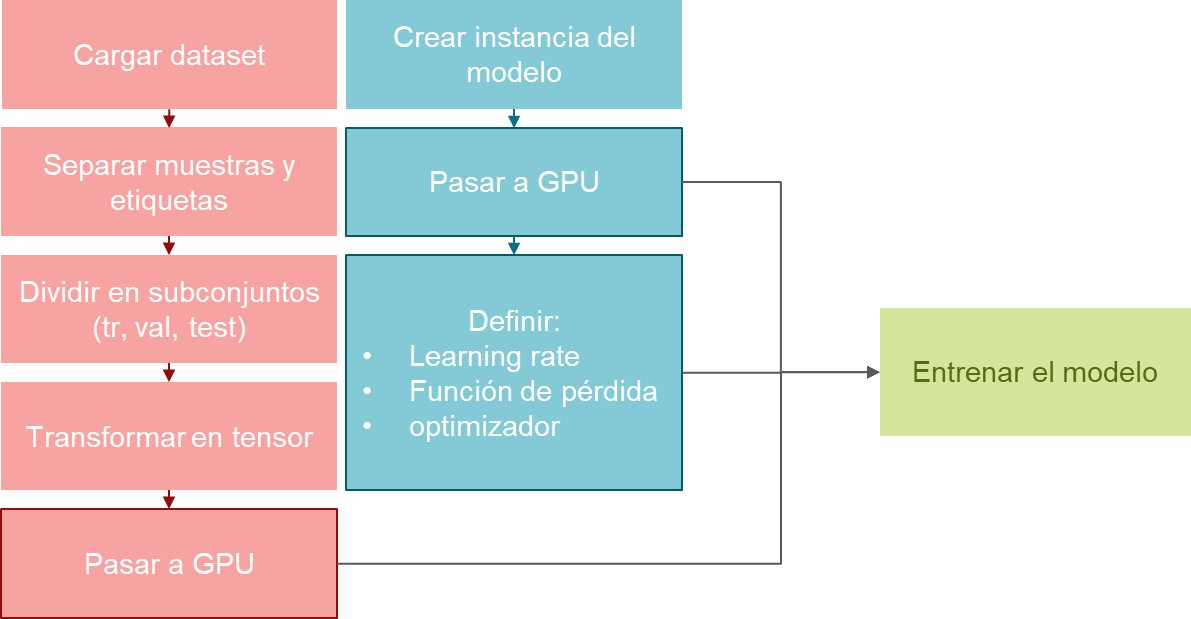

### 1. Cargar el modelo

In [ ]:
wine_dataset = load_wine()

### 2. Separar muestras y etiquetas

In [ ]:
X, y = wine_dataset.data, wine_dataset.target

### 3. Dividir dataset entre entrenamiento y validación

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [ ]:
X_train.shape

(142, 13)

### 4. Crear tensores a partir de los datos y asignarlo a la GPU

In [ ]:
X_tr_tensor = torch.tensor(X_train, dtype=torch.float32, device=0)
y_tr_tensor = torch.tensor(y_train, dtype=torch.long, device=0)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32, device=0)
y_val_tensor = torch.tensor(y_val, dtype=torch.long, device=0)

In [ ]:
X_tr_tensor

tensor([[1.4220e+01, 3.9900e+00, 2.5100e+00,  ..., 8.9000e-01, 3.5300e+00,
         7.6000e+02],
        [1.3520e+01, 3.1700e+00, 2.7200e+00,  ..., 8.9000e-01, 2.0600e+00,
         5.2000e+02],
        [1.2080e+01, 1.1300e+00, 2.5100e+00,  ..., 1.3100e+00, 2.7200e+00,
         6.3000e+02],
        ...,
        [1.2790e+01, 2.6700e+00, 2.4800e+00,  ..., 4.8000e-01, 1.4700e+00,
         4.8000e+02],
        [1.2360e+01, 3.8300e+00, 2.3800e+00,  ..., 5.6000e-01, 1.5800e+00,
         5.2000e+02],
        [1.1410e+01, 7.4000e-01, 2.5000e+00,  ..., 1.1000e+00, 2.3100e+00,
         4.3400e+02]], device='cuda:0')

### 5. Crear instancia del modelo

In [ ]:
model = MLP_pytorch(input_shape=13, n_classes=3).to(0)

### 6. Definir parámetros de entrenamiento del modelo

In [ ]:
epochs = 4
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 7. Entrenar el modelo

In [ ]:
for epoch in range(epochs):

  model.train()
  optimizer.zero_grad()
  output = model(X_tr_tensor)

  loss = criterion(output, y_tr_tensor)
  loss.backward()
  optimizer.step()


  print(f"Epoch [{epoch+1}/{epochs}], Loss training: {loss.item():.2f}")

  model.eval()
  with torch.no_grad():
    val_output = model(X_val_tensor)
    val_loss = criterion(val_output, y_val_tensor)

    print(f"Epoch [{epoch+1}/{epochs}], Loss validation: {val_loss.item():.2f}")

Epoch [1/4], Loss training: 31.42
Epoch [1/4], Loss validation: 27.31
Epoch [2/4], Loss training: 27.54
Epoch [2/4], Loss validation: 23.07
Epoch [3/4], Loss training: 23.67
Epoch [3/4], Loss validation: 18.85
Epoch [4/4], Loss training: 19.81
Epoch [4/4], Loss validation: 14.64
